In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
nbaData = pd.read_csv("all_seasons.csv")
nbaData.head()

,Index,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22,213.36,106.59412,Connecticut,USA,1996,1,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30,208.28,106.59412,Iowa,USA,Undrafted,0,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29,210.82,111.13004,Providence,USA,Undrafted,0,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22,205.74,106.59412,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [3]:
nbaData.dtypes

Index                  int64
player_name           object
team_abbreviation     object
age                    int64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round            int64
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

In [4]:
nbaData.season

0        1996-97
1        1996-97
2        1996-97
3        1996-97
4        1996-97
          ...   
11695    2020-21
11696    2020-21
11697    2020-21
11698    2020-21
11699    2020-21
Name: season, Length: 11700, dtype: object

In [5]:
# nbaData = pd.DataFrame(nbaData[nbaData['gp'] >= 58])
# nbaData.gp

In [6]:
all_seasons = []
    
for season in range(1996, 2000):
    if season + 1 - 1900 == 100:
        year = f"{season}-{'00'}"
    else:
        year = f'{season}-{season+1 - 1900}'
    all_seasons.append(nbaData[nbaData['season'] == year])
for season in range(2000, 2021):
    if season + 1 - 2000 < 10:
        year = f"{season}-{'0' + str(season+1-2000)}"
    else: 
        year = f'{season}-{season+1 - 2000}'
    all_seasons.append(nbaData[nbaData['season'] == year])

In [7]:
bestPlayers = []
worstPlayers = []
for i in range(len(all_seasons)):
    season = all_seasons[i]
    maxGamesPlayedID = season['gp'].idxmax()
    maxGamesPlayed = season.loc[maxGamesPlayedID]
    maxGames = maxGamesPlayed['gp']
    maxGames *= 0.7
    
    mySeason = season[season['gp'] >= round(maxGames)]
    
    bestScorerID = mySeason['pts'].idxmax()
    shitGuyID = mySeason['pts'].idxmin()
    
    bestScorer = nbaData.loc[bestScorerID]
    worstScorer = nbaData.loc[shitGuyID]
    bestPlayers.append(bestScorer)
    worstPlayers.append(worstScorer)

In [8]:
for i in range(len(bestPlayers)):
    print(bestPlayers[i])

Index                            47
player_name          Michael Jordan
team_abbreviation               CHI
age                              34
player_height                198.12
player_weight             97.975872
college              North Carolina
country                         USA
draft_year                     1984
draft_round                       1
draft_number                      3
gp                               82
pts                            29.6
reb                             5.9
ast                             4.3
net_rating                     13.4
oreb_pct                      0.042
dreb_pct                      0.132
usg_pct                       0.331
ts_pct                        0.567
ast_pct                       0.208
season                      1996-97
Name: 47, dtype: object
Index                           854
player_name          Michael Jordan
team_abbreviation               CHI
age                              35
player_height                198.12
play

In [9]:
for i in range(len(worstPlayers)):
    print(worstPlayers[i])

Index                          376
player_name          Ivano Newbill
team_abbreviation              ATL
age                             26
player_height               208.28
player_weight            111.13004
college               Georgia Tech
country                        USA
draft_year                    1994
draft_round                      0
draft_number             Undrafted
gp                              72
pts                            1.4
reb                            2.8
ast                            0.3
net_rating                     2.5
oreb_pct                     0.104
dreb_pct                     0.189
usg_pct                      0.083
ts_pct                       0.439
ast_pct                      0.042
season                     1996-97
Name: 376, dtype: object
Index                            876
player_name             Michael Cage
team_abbreviation                NJN
age                               36
player_height                 205.74
player_weight       

In [10]:
drafted = pd.DataFrame(nbaData['draft_round']) 
rating = pd.DataFrame(nbaData['net_rating']) # predictor
drafted['draft_round'] = drafted['draft_round'].replace([1], 'True')
drafted['draft_round'] = drafted['draft_round'].replace([0, 2, 3, 4, 5, 6, 7, 8], 'False')
drafted.columns = ['draftRound1']

In [11]:
y = pd.DataFrame(drafted["draftRound1"])
X = pd.DataFrame(nbaData["pts"])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (8775, 1) (8775, 1)
Test Set  : (2925, 1) (2925, 1)


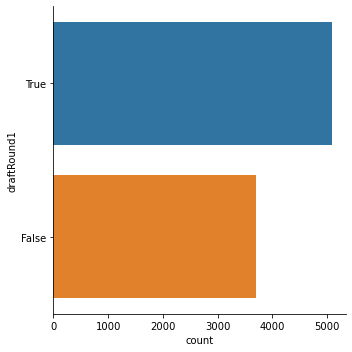

In [13]:
y_train["draftRound1"].value_counts()
sb.catplot(y = "draftRound1", data = y_train, kind = "count")

In [14]:
X_train.describe()

,pts
count,8775.000000
mean,8.166929
std,5.959374
min,0.000000
25%,3.600000
50%,6.700000
75%,11.500000
max,36.100000


In [15]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'pts <= 6.95\ngini = 0.488\nsamples = 8775\nvalue = [3694, 5081]\nclass = True'),
 Text(167.4, 326.16, 'pts <= 3.35\ngini = 0.49\nsamples = 4529\nvalue = [2587, 1942]\nclass = False'),
 Text(83.7, 108.72000000000003, 'gini = 0.44\nsamples = 2028\nvalue = [1366, 662]\nclass = False'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.5\nsamples = 2501\nvalue = [1221, 1280]\nclass = True'),
 Text(502.20000000000005, 326.16, 'pts <= 14.85\ngini = 0.385\nsamples = 4246\nvalue = [1107, 3139]\nclass = True'),
 Text(418.5, 108.72000000000003, 'gini = 0.439\nsamples = 2992\nvalue = [972, 2020]\nclass = True'),
 Text(585.9, 108.72000000000003, 'gini = 0.192\nsamples = 1254\nvalue = [135, 1119]\nclass = True')]

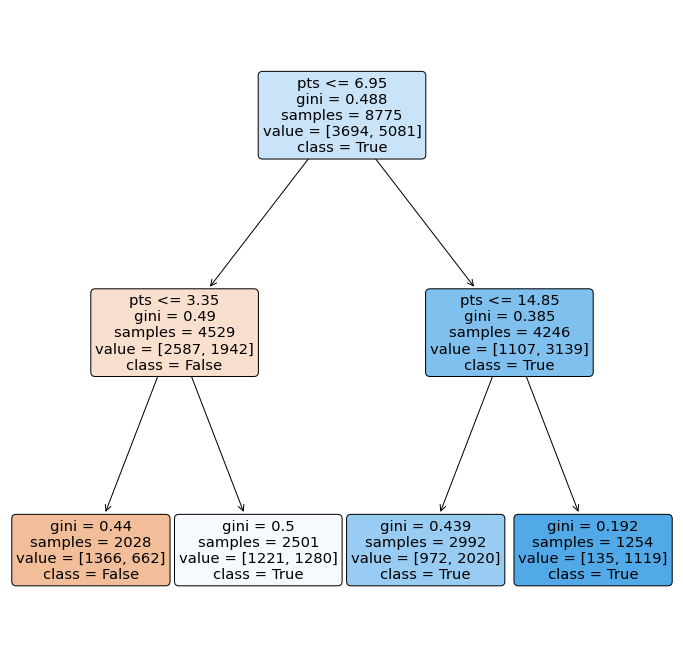

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["False","True"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6592592592592592

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6632478632478632



<AxesSubplot:>

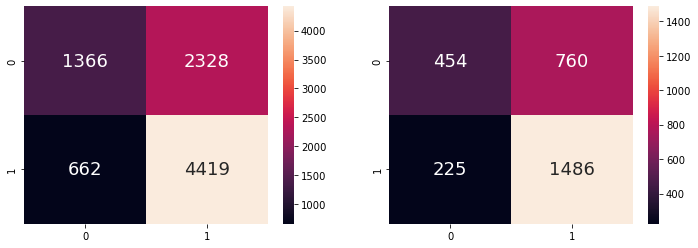

In [17]:
from sklearn.metrics import confusion_matrix
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [18]:
bestPlayerNames = []
for i in bestPlayers:
    bestPlayerNames.append(i['player_name'])
nbaData_pred = nbaData[nbaData["player_name"].isin(bestPlayerNames)]
nbaData_pred.drop_duplicates(subset ="player_name", inplace=True)
X_pred = pd.DataFrame(nbaData_pred['pts'])
y_pred = dectree.predict(X_pred)

C:\Users\aloys\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [19]:
y_pred = pd.DataFrame(y_pred, columns = ["IsRoundOnePickPred"], index = nbaData_pred.index)
nbaData_acc = pd.concat([nbaData_pred[["player_name", "draft_round"]], y_pred], axis = 1)
nbaData_acc

,player_name,draft_round,IsRoundOnePickPred
47,Michael Jordan,1,True
96,Kobe Bryant,1,True
200,Shaquille O'Neal,1,True
290,Allen Iverson,1,True
743,Tracy McGrady,1,True
3131,LeBron James,1,True
3343,Carmelo Anthony,1,True
3467,Dwyane Wade,1,True
5076,Kevin Durant,1,True
5551,Russell Westbrook,1,True


In [20]:
worstPlayerNames = []
for i in worstPlayers:
    worstPlayerNames.append(i['player_name'])
nbaData_pred2 = nbaData[nbaData["player_name"].isin(worstPlayerNames)]
nbaData_pred2.drop_duplicates(subset ="player_name", inplace=True)
X_pred = pd.DataFrame(nbaData_pred2['pts'])
y_pred = dectree.predict(X_pred)

C:\Users\aloys\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [21]:
y_pred = pd.DataFrame(y_pred, columns = ["IsRoundOnePickPred"], index = nbaData_pred2.index)
nbaData_acc = pd.concat([nbaData_pred2[["player_name", "draft_round"]], y_pred], axis = 1)
nbaData_acc

,player_name,draft_round,IsRoundOnePickPred
0,Travis Knight,1,True
6,Mark West,2,False
51,Michael Cage,1,False
59,Jud Buechler,2,False
323,Ben Wallace,0,False
376,Ivano Newbill,0,False
687,Scot Pollard,1,False
1147,Nazr Mohammed,1,False
1324,Michael Ruffin,2,False
1780,Mark Madsen,1,False
